In [ ]:
!pip install sklearn-pycrfsuite
!pip install python-crfsuite
!pip install tagger
!pip install nltk

     |████████████████████████████████| 485 kB 10.9 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11001 sha256=bfb3a50c2b9b7f916722c0046c607449ec0e7fc9bc0ea3522fa24964dd636c13
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=776528 sha256=d25ad7f8eb7b51d37556f5cd563614311057bd36490db5054bb9302d9bd06c63
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension
     |████████████████████████████████| 743 kB 8.8 MB/s 
ERROR: Cannot install tagger==0.2, tagger==0.2.2, tagger==0.3 and tagger==0.3.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    tagger 0.3.1 depends on rdflib==2.3.1events
    tagger 

In [ ]:

import nltk
from nltk.tag import CRFTagger
import pandas as pd
from sklearn.metrics import confusion_matrix

from google.colab import  drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
root_path_training="gdrive/My Drive/Garhwali pos tagging project/dataset/final/TAGGED DATA (1).txt"
file_train=open(root_path_training,"r",encoding="UTF-8")
train_=file_train.readlines()
print("number of training sentences : ",len(train_))


root_path_test="gdrive/My Drive/Garhwali pos tagging project/dataset/final/Validate.TXT"
file_test=open(root_path_test,"r",encoding="UTF-8")
test_=file_test.readlines()
print("number of test sentences : ",len(test_))

number of training sentences :  6581
number of test sentences :  731


In [ ]:
###############################################################################
#----- FUNCTION TO CREATE LIST OF LIST OF TUPLE(WORD,TAG)----------------#
###############################################################################
def sent_to_labels(data):
    content=[]
    for sentence in data:
        sent=[]
        sentence=sentence.strip("\n")
        for wrd_tg in sentence.split(" "):
            w_t=tuple(wrd_tg.split("_"))
            sent.append(w_t)
        content.append(sent)
    return content    
        



In [ ]:
###############################################################################
#----- FUNCTION TO CREATE LIST OF LIST OF WORD----------------#
###############################################################################
def validate_sentences(validate_text):
    validate=[]
    for lines in validate_text:
        sent=[]
        for tagged in lines.split():
            wrd=tagged.split("_")[0]
            sent.append(wrd)
        validate.append(sent)
    return validate    
        
        

In [ ]:
############################################################################
#---- CALLING FUNCITON TO CREATE THE TRAIN DATA LIST [[(W1,T1),(W2,T2)]]
############################################################################
train_data=sent_to_labels(train_)


############################################################################
#---- CALLING FUNCITON TO CREATE THE VALIDATE DATA LIST [[(W1,T1),(W2,T2)]]
############################################################################
test_data=sent_to_labels(test_)


############################################################################################
#---- CALLING FUNCITON TO CREATE THE LIST OF SENTENCE TO VALIDATE DATA ON [["W1","W2"....]]
############################################################################################

test_sent=validate_sentences(test_)




In [ ]:
#Building Model
#crf_model=nltk.CRFTagger(verbose=True)
#Training options are added in the training part
crf_model=nltk.CRFTagger(verbose=False,training_opt={"c1":0,"c2":1})


#TRAINING THE MODEL
crf_model.train(train_data,"model.crf.tagger")



In [ ]:
#EVALUATING THE DATA
result=crf_model.evaluate(test_data)
print(result)

0.7978197234278793


# **Added Features**

In [ ]:
tagged_sent = crf_model.tag_sents(test_sent)

# **1. Reduplicative Tag** 
*two consecutive occurrence of the word or the word-word form. Second occurrence will be tagged as RDP*

In [ ]:
for ts in tagged_sent:
    ret=len(ts)-2
    for w in range(ret):
        if(ts[w][0]==ts[w+1][0]):
            ts[w+1]=list(ts[w])
            print(ts[w][0],ts[w+1][0])
            ts[w+1][1]='RDP'
            ts[w+1]=tuple(ts[w+1])
        if(ts[w][0]==ts[w+2][0] and ts[w+1][0]=='-'):
            #print(ts[w][0],ts[w+2][0])
            ts[w+2]=list(ts[w+2])
            ts[w+2][1]='RDP'
            ts[w+2]=tuple(ts[w+2])
            


# ACCURACY - RDP feature added
list_manual=[word[1] for sent in tagged_sent for word in sent]
list_tagger=[word[1] for sent in test_data for word in sent]
matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
summ=0
acuuracy=0
for tag in list(set(list_tagger)):
    summ+=df[tag][tag]
    
total = len([word for sent in tagged_sent for word in sent])
accuracy=summ/total       

print(accuracy)            

ट्व्का ट्व्का
झड़दा झड़दा
लंगी लंगी
नाचे नाचे
अलग अलग
थ्वडा थ्वडा
क्या क्या
अजीब अजीब
धीरे धीरे
बड़ी बड़ी
अलग अलग
महीना महीना
अलग अलग
ना ना
जख जख
उख उख
म्वाटो म्वाटो
जख जख
अलग अलग
जगा जगा
इन इन
बार बार
बार बार
पैथर पैथर
क्या क्या
कखि कखि
सुरक सुरक
लम्बा लम्बा
धार धार
अपणी अपणी
क्या क्या
आदि आदि
ना ना
धीरे धीरे
नै नै
0.8290097910568285


# **2. Unknown Tag**

*words only tagged as unknown in the training set will be tagged as UNK in the test set also*





In [ ]:
#Words only tagged as UNK in the train data will be tagged as UNK  

unknown_wrd=train_data
unknown_wrd=[word[0] for sent in train_data for word in sent if(word[1]=='UNK')]
allwrd=[word for sent in train_data for word in sent]
unk_tags={}

#list of unknown words
for unk in unknown_wrd:
    temp=[]
    for word in allwrd:
        if(unk==word[0]):
            temp.append(word[1])
    unk_tags[unk]=list(set(temp))        
unknown_wrd=[]
for word in unk_tags:
    if(unk_tags[word]==['UNK']):
        unknown_wrd.append(word)
        
for sent in tagged_sent:
    for word in sent:
        if(word[0] in unknown_wrd):
            word=list(word)
            word[1]="UNK"
            word=tuple(word)
            
            
            
## ACCURACY CALCULATION
list_manual=[word[1] for sent in tagged_sent for word in sent]
list_tagger=[word[1] for sent in test_data for word in sent]
matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
summ=0
acuuracy=0
for tag in list(set(list_tagger)):
    summ+=df[tag][tag]

total = len([word for sent in tagged_sent for word in sent])
accuracy=summ/total   
print(accuracy)            

0.8290097910568285


# **3. Symbol Tag**
*All the special characters except for the numeric characters will be tagged as SYM*




In [ ]:
#Special Characters in the data will be tagged as SYM

sym=[word[0] for sent in train_data for word in sent if(word[1] == 'SYM')]
sym=list(set(sym))
for sent in tagged_sent:
    leng=len(sent)-1
    for w in range(leng):
        if(sent[w][1]=='SYM'):
            if not (sent[w][0] in sym):
                
                
                tag=tagger.tag([sent[w][0]])
                sent[w]=list(sent[w])
                sent[w][1]=tag[0][1]
                sent[w]=tuple(sent[w])
              

## ACCURACY CALCULATION
list_manual=[word[1] for sent in tagged_sent for word in sent]
list_tagger=[word[1] for sent in test_data for word in sent]
matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
summ=0
acuuracy=0
for tag in list(set(list_tagger)):
    summ+=df[tag][tag]
    
    
total = len([word for sent in tagged_sent for word in sent])
accuracy=summ/total   

print(accuracy)                

0.8290097910568285


# **4. Verb Tag**
*words containing entire word which tagged as NN and ending with ['ली' , 'लि' , 'नि' , 'नी'  , 'ण' , 'णी' , 'णि ' , ' ु', ' ू' ]   will tagged as VM*

In [ ]:
# NN_words = [word[0] for sent in train_data for word in sent if(word[1]=='NN')]
# all_wrd= [word for sent in train_data for word in sent]
# NV_words = []
# for word in all_wrd:
#     if(word[0] in NN_words):
#         if(word[1] == 'NN' and (word[1] == 'VM' or word[1] == 'VAUX')):
#             NV_words.append(word[0])

            
# ending_diacritic=['ली' , 'लि' , 'नि' , 'नी'  , 'ण' , 'णी' , 'णि ' , ' ु', ' ू' ]            
# for sent in tagged_sent:
#     for word in sent:
#         Val=0
#         for w in NV_words:
#             if(word[0] in w):
#                 Val=1
            
#         if(Val == 1):
#             if(word[-2:] in ending_diacritic or word[-1] in ending_diacritic):
#                 word=list(word)
#                 word[1]='VM'
#                 word=tuple(word)


# ## ACCURACY CALCULATION
# list_manual=[word[1] for sent in tagged_sent for word in sent]
# list_tagger=[word[1] for sent in test_data for word in sent]
# matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
# df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
# summ=0
# acuuracy=0
# for tag in list(set(list_tagger)):
#     summ+=df[tag][tag]
#     #print(tag,summ)

# total = len([word for sent in tagged_sent for word in sent])
# accuracy=summ/total   

# print(accuracy)

# **5.Auxiliary Words**
*words after Verb will be tagged as Auxiliary Verb*

In [ ]:
# #list of words that are tagged as VERB or VAUX
# v_wrd=train_data
# v_wrd=[word[0] for sent in train_data for word in sent if(word[1]=='VERB' or word[1]=='VAUX')]
# allwrd=[word for sent in train_data for word in sent]
# v_tags={}

# #list of verb or vaux words
# for v in v_wrd:
#     temp=[]
#     for word in allwrd:
#         if(v==word[0]):
#             temp.append(word[1])
#     v_tags[v]=list(set(temp))        

# vv_words=[]    
# for word in v_tags:
#     if(len(v_tags[word]) <= 2):
#         if(v_tags[word] in ['VAUX','VM']):
#             vv_words.append(word)
            
# for sent in tagged_sent:
#     leng=len(sent)-1
#     for w in range(leng):
#         if(sent[w][1] in ['VM','VAUX'] and sent[w+1][0] in vv_words):
#             sent[w+1]=list(sent[w+1])
#             sent[w+1][1]='VAUX'
#             sent[w+1]=tuple(sent[w+1])



# ## ACCURACY CALCULATION
# list_manual=[word[1] for sent in tagged_sent for word in sent]
# list_tagger=[word[1] for sent in test_data for word in sent]
# matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
# df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
# summ=0
# acuuracy=0
# for tag in list(set(list_tagger)):
#     summ+=df[tag][tag]
#     print(tag,summ)


# total = len([word for sent in tagged_sent for word in sent])
# accuracy=summ/total 


# print(accuracy)

# **6. Using StanfordNlp Library**
*Using Stanfordnlp library to deal with adjective and adverb*

In [ ]:
# import stanfordnlp
# nlp = stanfordnlp.Pipeline(processors = 'tokenize,pos' , lang = 'hi' , models_dir= r"C:\Users\Hp\stanfordnlp_resources")


# jr_words = [word[0] for sent in train_data for word in sent if(word[1] == 'RB' or word[1] == 'JJ')]
# jr_words = list(set(jr_words))

# acceptable=['JJ','RB']

# jr_dict={}
# for word in jr_words:
#     jr_dict[word]=[]



# for sent in train_data:
#     leng=len(sent)
#     for w in range(leng):
#         if(sent[w][0] in jr_words and sent[w][1] in acceptable):
#             jr_dict[sent[w][0]].append(sent[w][1])
            
            
            
            
# for word in jr_dict:
#     jr_dict[word]=list(set(jr_dict[word]))
                

# #dictionary that contains pos tags and their explanations
# pos_dict = {"ADJ":"JJ",
#             "ADV":"RB"}

# #extract parts of speech
# def extract_pos(doc):
#     for sent in doc.sentences:
        
#         s=[]
#         for wrd in sent.words:
#             if wrd.pos in pos_dict.keys():
#                 wrd.pos = pos_dict[word.pos]
#             temp=(wrd.text,wrd.pos)
            
#             s.append(temp)
        

#         return(s)   


# stand_sent=[]
# for sentence in tagged_sent:
#     s=""
#     leng=len(sentence)
#     print(leng)
#     for w in range(leng):
#         s = s+" {}".format(sentence[w][0])
#     s = s[1:]
#     doc = nlp(s)
#     stanfrdnlp = extract_pos(doc)
#     stand_sent.append(stanfrdnlp)
    


# len(tagged_sent)
# for s_ind in range(len(tagged_sent)):
#     for w_ind in range(len(tagged_sent[s_ind])):
#         if(tagged_sent[s_ind][w_ind][1] == 'RB' or tagged_sent[s_ind][w_ind][1] == 'JJ'):
#             try:
#                 tagged_sent[s_ind][w_ind] = list(tagged_sent[s_ind][w_ind])
#                 print("s",s_ind,"w",w_ind, tagged_sent[s_ind],tagged_sent[s_ind][w_ind],tagged_sent[s_ind][w_ind][1])
#                 tagged_sent[s_ind][w_ind][1] = stand_sent[s_ind][w_ind][1]
#                 tagged_sent[s_ind][w_ind]=tuple(tagged_sent[s_ind][w_ind])
#             except: 
#                 continue



# ## ACCURACY CALCULATION
# list_manual=[word[1] for sent in tagged_sent for word in sent]
# list_tagger=[word[1] for sent in validate_data for word in sent]
# matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
# df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
# summ=0
# acuuracy=0
# for tag in list(set(list_tagger)):
#     summ+=df[tag][tag]
#     #print(tag,summ)


# total = len([word for sent in tagged_sent for word in sent])
# accuracy=summ/total   


# print(accuracy)


# **7. Only Single Tag**
*Assigning the same tag to the word which are only tagged with a single type of category thoroughly in the training_data*

In [ ]:
# jr_words = [word[0] for sent in train_data for word in sent]
# jr_words = list(set(jr_words))
# word_dict={}
# for jr in jr_words:
#     temp=[]
#     for sent in tagged_sent:
#         for word in sent:
#             if(jr == word[0]):
#                 temp.append(word[1])
#     if(len(list(set(temp))) == 1):
#         if('RB' in temp or 'JJ' in temp):
#             word_dict[jr]=list(set(temp))
    
    

# for sent in tagged_sent:
#     for word in sent:
#         if(word[0] in word_dict.keys()):
#             word = list(word)
#             w=word[0]
#             word[1] = word_dict[w]
#             word = tuple(word)



# ## ACCURACY CALCULATION
# list_manual=[word[1] for sent in tagged_sent for word in sent]
# list_tagger=[word[1] for sent in test_data for word in sent]
# matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))
# df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))
# summ=0
# acuuracy=0
# for tag in list(set(list_tagger)):
#     summ+=df[tag][tag]

# total = len([word for sent in tagged_sent for word in sent])
# accuracy=summ/total   


# print(accuracy)

# **Graphical Represtation of Error**

In [ ]:
#sentences_tagged_by_tagger without add on features
tagged_sent=crf_model.tag_sents(test_sent)

In [ ]:
list_tagger=[word[1] for sent in test_data for word in sent]

In [ ]:
list_manual=[word[1] for sent in tagged_sent for word in sent]

In [ ]:
matrix=confusion_matrix(list_tagger,list_manual,labels=list(set(list_tagger)))

In [ ]:
df=pd.DataFrame(matrix,index=list(set(list_tagger)),columns=list(set(list_tagger)))


In [ ]:
summ=0
acuuracy=0
for tag in list(set(list_tagger)):
    summ+=df[tag][tag]
    
    
accuracy=summ/len(list_tagger)  

In [ ]:
df["WQ"]=df["WQ"]
df["QC"]=df["QC"]+df["QCC"]
df["DEM"]=df["DEM"]
df["PSP"]=df["PSP"]+df["PSPC"]
df["QF"]=df["QF"]
df["NEG"]=df["NEG"]
df["NNP"]=df["NNP"]+df["NNPC"]
df["JJ"]=df["JJ"]+df["JJC"]
df["RB"]=df["RB"]+df["RBC"]
df["NN"]=df["NN"]+df["NNC"]
df["UNK"]=df["UNK"]
df["VM"]=df["VM"]+df["VMC"]
df["RP"]=df["RP"]



df.drop(["QCC","PSPC","NNPC","JJC","RBC","NNC","VMC"],axis=1,inplace=True)



In [ ]:

df.loc["WQ",:]=df.loc["WQ",:]
df.loc["QC",:]=df.loc["QC",:]+df.loc["QCC",:]
df.loc["DEM",:]=df.loc["DEM",:]
df.loc["PSP",:]=df.loc["PSP",:]+df.loc["PSPC",:]
df.loc["QF",:]=df.loc["QF",:]
df.loc["NEG",:]=df.loc["NEG",:]
df.loc["NNP",:]=df.loc["NNP",:]+df.loc["NNPC",:]
df.loc["JJ",:]=df.loc["JJ",:]+df.loc["JJC",:]
df.loc["RB",:]=df.loc["RB",:]+df.loc["RBC",:]
df.loc["NN",:]=df.loc["NN",:]+df.loc["NNC",:]
df.loc["UNK",:]=df.loc["UNK",:]
df.loc["VM",:]=df.loc["VM",:]+df.loc["VMC",:]
df.loc["RP",:]=df.loc["RP",:]

df.drop(["QCC","PSPC","NNPC","JJC","RBC","NNC","VMC"],axis=0,inplace=True)




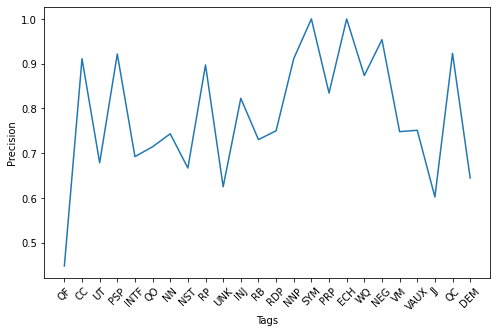

In [ ]:

import matplotlib.pyplot as plt

labels=[]
precision=[]
prec_err=[]
labels=df.columns



for tag in labels:
    tp=df[tag][tag]
    fp=0
    others=[]
    others=[lab for lab in labels if not lab==tag]
    for other in others:
        fp=fp+df[tag][other]
    prec=tp/(tp+fp)
    precision.append(prec)
    prec_err.append(1-prec)    
    
    
    

plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.plot(labels, precision)
plt.xlabel("Tags")
plt.ylabel("Precision")
plt.show()


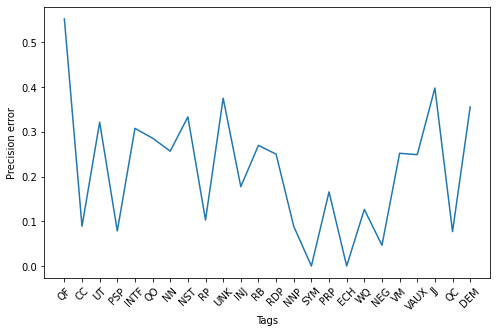

In [ ]:

plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
plt.plot(labels, prec_err)

plt.xlabel("Tags")
plt.ylabel("Precision error")
plt.show()